In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open the ECI results page
driver.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm")

In [2]:
# Wait for the dropdown element to be clickable and click on it
dropdown = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]'))
)
dropdown.click()

# Select the desired state from the dropdown
state_option = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/main/div/section/div/div[2]/div[1]/div/div[1]/div/select"))
)
state_option.send_keys('Ladakh')
state_option.click()

In [3]:
# Wait for the dropdown element to be clickable and click on it
dropdown = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]'))
)
dropdown.click()

# Wait for the link to the results to be clickable and click on it
c = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]/option[2]'))
) 
c.click()  

# Wait for the link to the results to be clickable and click on it
results_links = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '/html/body/main/div/div[2]/div[2]/ul/li[2]/a/img'))
)
results_links.click()

# Wait for the table containing the results to be visible
results_table = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((By.CLASS_NAME, "table-responsive"))
)

# Extract data from the table
rows = results_table.find_elements(By.TAG_NAME, "tr")
party_results = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_elements(By.TAG_NAME, "td")
    if cols:
        sn = cols[0].text.strip()
        c = cols[1].text.strip()
        p = cols[2].text.strip()
        evm = cols[3].text.strip()
        pv = cols[4].text.strip()
        tv = cols[5].text.strip()
        ov = cols[6].text.strip()
        party_results.append({'S.No': sn, 'Candidate': c, 'Party': p, 'EVM Votes': evm, 'Postal Votes': pv, 'Total Votes': tv, 'Percentage of votes': ov})
        
# Convert the results to a DataFrame
df = pd.DataFrame(party_results)

# Save the DataFrame to a CSV file
df.to_csv('1 - Ladakh (Ladakh).csv', index=False)

In [4]:
# Close the WebDriver
driver.quit()

Data from 1 - Ladakh (Ladakh).csv:
   S.No        Candidate                     Party  EVM Votes  Postal Votes  \
0     1   MOHMAD HANEEFA               Independent      64443           816   
1     2  TSERING NAMGYAL  Indian National Congress      35770          1627   
2     3    TASHI GYALSON    Bharatiya Janata Party      31505           451   
3     4             NOTA         None of the Above        896            16   

   Total Votes  Percentage of votes  
0        65259                48.15  
1        37397                27.59  
2        31956                23.58  
3          912                 0.67  
Data from Combined_Election_Results.csv:
   S.No        Candidate                     Party  EVM Votes  Postal Votes  \
0     1   MOHMAD HANEEFA               Independent      64443           816   
1     2  TSERING NAMGYAL  Indian National Congress      35770          1627   
2     3    TASHI GYALSON    Bharatiya Janata Party      31505           451   
3     4             NO

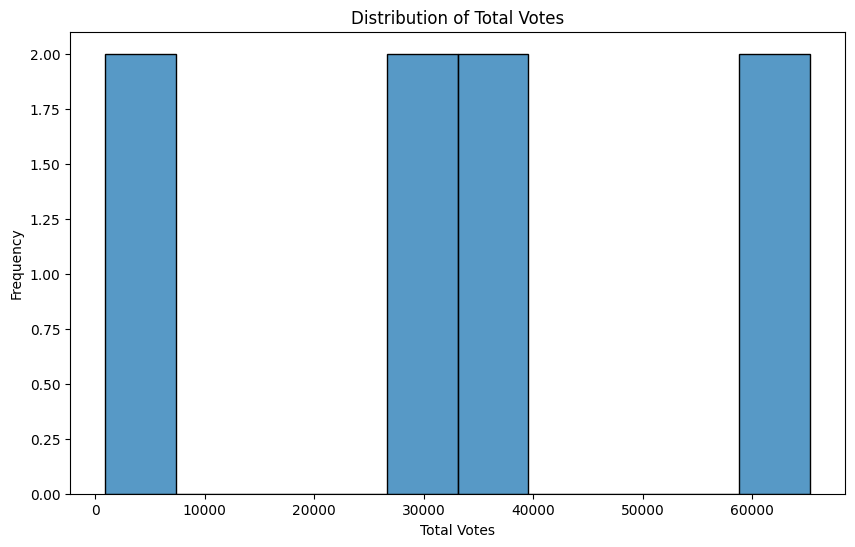

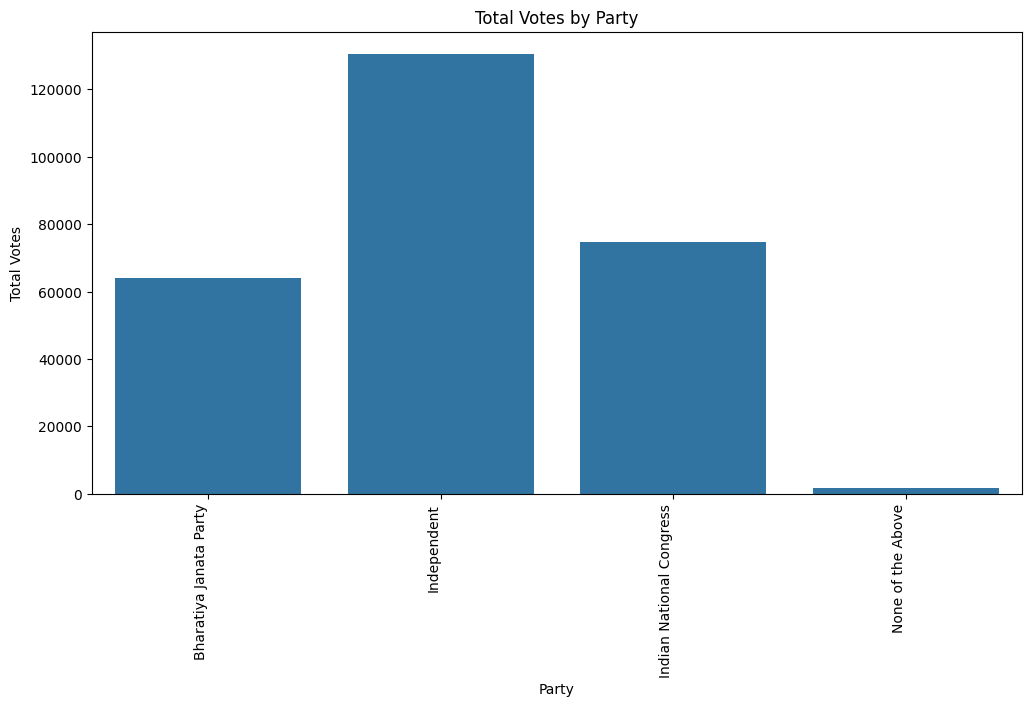

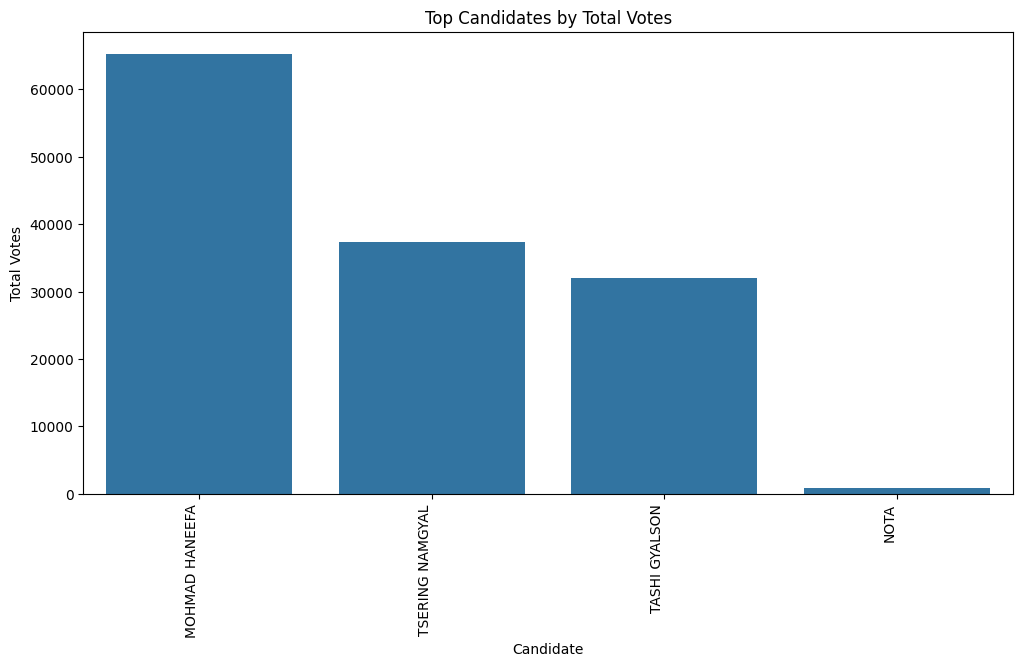

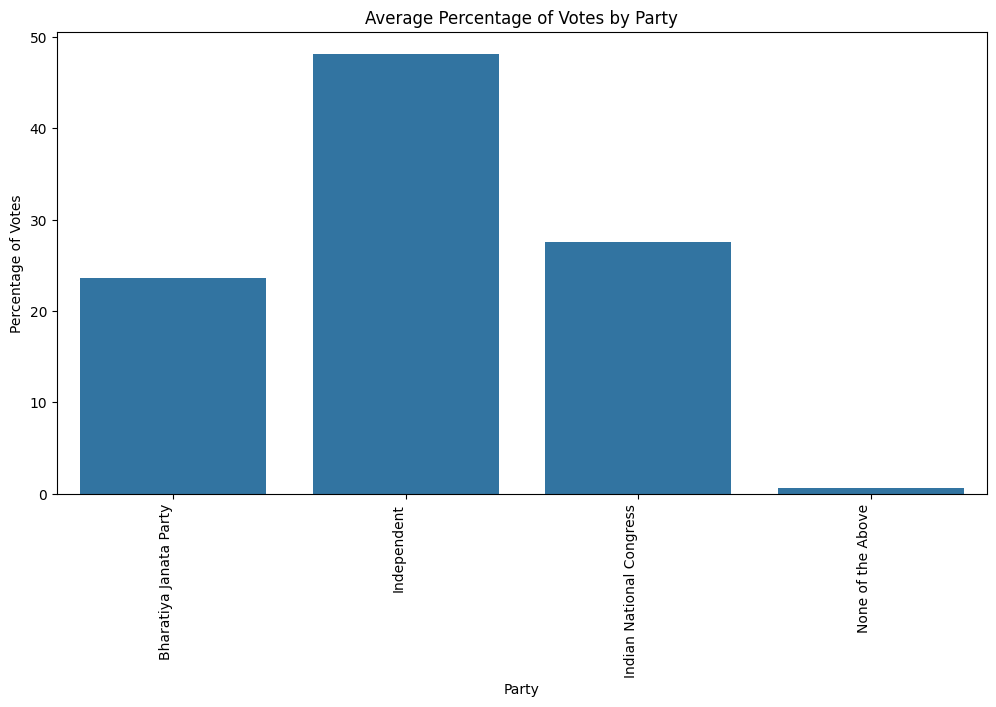

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder path containing CSV files
folder_path = r'C:\Users\Muskan\OneDrive\Desktop\Kalvium Task\Ladakh'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

all_data = []

for file in csv_files:
    try:
        # Construct full file path
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Print first few rows for debugging
        print(f"Data from {file}:")
        print(df.head())
        
        # Convert all columns to strings to ensure .str accessor works
        df = df.astype(str)
        
        # Clean data
        df.dropna(inplace=True)
        
        # Replace non-numeric values with 0
        df['EVM Votes'] = df['EVM Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Postal Votes'] = df['Postal Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Total Votes'] = df['Total Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Percentage of votes'] = df['Percentage of votes'].str.replace('%', '').replace('-', '0').astype(float)
        
        # Append data to the list
        all_data.append(df)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate all DataFrames into one
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Save the combined data to a new CSV file
    combined_df.to_csv('Combined_Election_Results.csv', index=False)

    # Perform Data Analysis and Visualization
    # Basic statistics
    print(combined_df.describe())

    # Distribution of total votes
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Total Votes'], bins=10)
    plt.title('Distribution of Total Votes')
    plt.xlabel('Total Votes')
    plt.ylabel('Frequency')
    plt.show()

    # Party-wise total votes
    party_votes = combined_df.groupby('Party')['Total Votes'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Total Votes', data=party_votes)
    plt.title('Total Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90, ha='right')
    plt.show()

    # Top candidates by total votes
    top_candidates = combined_df.sort_values(by='Total Votes', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Candidate', y='Total Votes', data=top_candidates)
    plt.title('Top Candidates by Total Votes')
    plt.xlabel('Candidate')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90, ha='right')
    plt.show()

    # Party-wise percentage of votes
    party_percentage = combined_df.groupby('Party')['Percentage of votes'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Percentage of votes', data=party_percentage)
    plt.title('Average Percentage of Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Percentage of Votes')
    plt.xticks(rotation=90, ha='right')
    plt.show()
else:
    print("No data to process.")